In [1]:
import plotly.plotly as py
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv')
df.head()

df['text'] = df['name'] + '<br>Population ' + (df['pop']/1e6).astype(str)+' million'
limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]
cities = []
scale = 5000

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    city = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_sub['lon'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['pop']/scale,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1]) )
    cities.append(city)

layout = dict(
    height=800,   
    showlegend= False,
    geo= dict(       
        #showocean= True,            
        #showland= True,            
        #showlakes= True,            
        showcountries= True,        
    )
)

fig = dict( data=cities, layout=layout )
py.iplot( fig, validate=False, filename='d3-bubble-map-populations' )


In [4]:
%matplotlib inline
from IPython.display import GeoJSON

GeoJSON({
    "type": "Feature",
    "geometry": {
        "type": "Point",
        "coordinates": [-118.4563712, 34.0163116]
    },
    "properties": {
        "title": "Mapbox SF",
        "icon": "harbor"
    }
})
GeoJSON({
    "type": "Feature",
     "geometry": {
        "type": "MultiPoint",
        "coordinates": [[10, 40], [40, 30], [20, 20], [30, 10]]
    }    
})


<IPython.display.GeoJSON object>

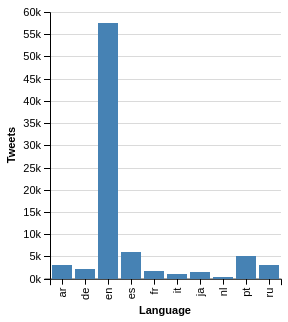

In [17]:
from IPython.display import display

{'es': 5968, 'ar': 3100, 'en': 57476, 'fr': 1674, 'pt': 5109, 'ja': 1481, 'ru': 3055, 'it': 978, 'de': 2274, 'nl': 297}

display({
    "application/vnd.vegalite.v1+json": {
        "$schema": "https://vega.github.io/schema/vega-lite/v1.json",
        "description": "A simple bar chart with embedded data.",
        "data": {
            "values": [
                {"Language": "en", "Tweets": 57476}, 
                {"Language": "es", "Tweets": 5968},                
                {"Language": "pt", "Tweets": 5109},                
                {"Language": "ar", "Tweets": 3100}, 
                {"Language": "ru", "Tweets": 3055},                
                {"Language": "de", "Tweets": 2274}, 
                {"Language": "fr", "Tweets": 1674}, 
                {"Language": "ja", "Tweets": 1481},                                
                {"Language": "it", "Tweets": 978},                
                {"Language": "nl", "Tweets": 297},                
            ]
        },
        "mark": "bar",
        "encoding": {
            "x": {"field": "Language", "type": "ordinal"},
            "y": {"field": "Tweets", "type": "quantitative"}
        }
    }
}, raw=True)

In [15]:
from IPython.display import GeoJSON
from IPython import display

import pandas as pd
import matplotlib.pyplot as plt

# kickoff 17:01, 
# goal at: 12, 43, 71, 91, 94
# yellow ru at: 94
# yellow ar at: 88

df = pd.read_csv('first-game-panda-frame_big.csv')

df['time_ms'] = pd.to_datetime(df['time_ms'], unit='ms')
df = df.set_index('time_ms')
print(len(df))

df = df['2018-06-14 16:30':'2018-06-14 16:35'] # goal 3
#df = df['2018-06-14 16:51':'2018-06-14 16:54'] # goal 4,5
print(len(df))

#df = df[df['lang'] == 'ar']
#df = df[df['lang'] == 'ru']

df = df[df['iso3166a3'] != 'POL']
df = df[df['iso3166a3'] != 'BIH']
df = df[df['iso3166a3'] != 'HUN']
df = df[df['iso3166a3'] != 'ROU']
df = df[df['iso3166a3'] != 'HRV']
df = df[df['iso3166a3'] != 'BGD']
df = df[df['iso3166a3'] != 'KOR']
df = df[df['iso3166a3'] != 'SWZ']
df = df[df['iso3166a3'] != 'JEY']

import plotly.plotly as py
import pandas as pd

d = zip(df.loc[:,'coord_x'], df.loc[:,'coord_y'])

map = GeoJSON({    
    "type": "Feature",
     "geometry": {
        "type": "MultiPoint",
        "coordinates": d 
    }    
})
print("hallo")
display.display(map, height='800px')

81412
2498
hallo


<IPython.display.GeoJSON object>